# Exploratory Data Analysis using Python - A Case Study

*Analyzing responses from the Stack Overflow Annual Developer Survey 2020*

![](https://i.imgur.com/qXhHKqv.png)

### Part 9 of "Data Analysis with Python: Zero to Pandas"

This tutorial series is a beginner-friendly introduction to programming and data analysis using the Python programming language. These tutorials take a practical and coding-focused approach. The best way to learn the material is to execute the code and experiment with it yourself. Check out the full series here: 

1. [First Steps with Python and Jupyter](https://jovian.ai/aakashns/first-steps-with-python)
2. [A Quick Tour of Variables and Data Types](https://jovian.ai/aakashns/python-variables-and-data-types)
3. [Branching using Conditional Statements and Loops](https://jovian.ai/aakashns/python-branching-and-loops)
4. [Writing Reusable Code Using Functions](https://jovian.ai/aakashns/python-functions-and-scope)
5. [Reading from and Writing to Files](https://jovian.ai/aakashns/python-os-and-filesystem)
6. [Numerical Computing with Python and Numpy](https://jovian.ai/aakashns/python-numerical-computing-with-numpy)
7. [Analyzing Tabular Data using Pandas](https://jovian.ai/aakashns/python-pandas-data-analysis)
8. [Data Visualization using Matplotlib & Seaborn](https://jovian.ai/aakashns/python-matplotlib-data-visualization)
9. [Exploratory Data Analysis - A Case Study](https://jovian.ai/aakashns/python-eda-stackoverflow-survey)

The following topics are covered in this tutorial:

- Selecting and downloading a dataset
- Data preparation and cleaning
- Exploratory analysis and visualization
- Asking and answering interesting questions
- Summarizing inferences and drawing conclusions

## Introduction

In this tutorial, we'll analyze the StackOverflow developer survey dataset. The dataset contains responses to an annual survey conducted by StackOverflow. You can find the raw data & official analysis here: https://insights.stackoverflow.com/survey.

There are several options for getting the dataset into Jupyter:

- Download the CSV manually and upload it via Jupyter's GUI
- Use the `urlretrieve` function from the `urllib.request` to download CSV files from a raw URL
- Use a helper library, e.g., [`opendatasets`](https://github.com/JovianML/opendatasets), which contains a collection of curated datasets and provides a helper function for direct download.

We'll use the `opendatasets` helper library to download the files.

In [1]:
import opendatasets as od

In [2]:
od.download("stackoverflow-developer-survey-2020")

Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_public.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_schema.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\README.txt


Let's verify that the dataset was downloaded into the directory `stackoverflow-developer-survey-2020` and retrieve the list of files in the dataset.

In [3]:
import os

In [4]:
os.listdir("stackoverflow-developer-survey-2020")

['README.txt', 'survey_results_public.csv', 'survey_results_schema.csv']

You can through the downloaded files using the "File" > "Open" menu option in Jupyter. It seems like the dataset contains three files:

- `README.txt` - Information about the dataset
- `survey_results_schema.csv` - The list of questions, and shortcodes for each question
- `survey_results_public.csv` - The full list of responses to the questions 

Let's load the CSV files using the Pandas library. We'll use the name `survey_raw_df` for the data frame to indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.

In [5]:
import pandas as pd

In [6]:
survey_raw_df = pd.read_csv("stackoverflow-developer-survey-2020/survey_results_public.csv")

In [7]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


The dataset contains over 64,000 responses to 60 questions (although many questions are optional). The responses have been anonymized to remove personally identifiable information, and each respondent has been assigned a randomized respondent ID.

Let's view the list of columns in the data frame. 

In [8]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

It appears that shortcodes for questions have been used as column names. 

We can refer to the schema file to see the full text of each question. The schema file contains only two columns: `Column` and `QuestionText`. We can load it as Pandas Series with `Column` as the index and the  `QuestionText` as the value.

In [9]:
schema_fname = "stackoverflow-developer-survey-2020/survey_results_schema.csv"


In [10]:
pd.read_csv(schema_fname, 
            #index_col = "Column"
           )

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [11]:
pd.read_csv(schema_fname, index_col = "Column")

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
...,...
WebframeWorkedWith,Which web frameworks have you done extensive d...
WelcomeChange,"Compared to last year, how welcome do you feel..."
WorkWeekHrs,"On average, how many hours per week do you wor..."


In [12]:
schema_raw = pd.read_csv(schema_fname, index_col = "Column").QuestionText

In [13]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [14]:
schema_raw["YearsCodePro"]

'NOT including education, how many years have you coded professionally (as a part of your work)?'

We've now loaded the dataset. We're ready to move on to the next step of preprocessing & cleaning the data for our analysis.

### Save and upload your notebook

Whether you're running this Jupyter notebook online or on your computer, it's essential to save your work from time to time. You can continue working on a saved notebook later or share it with friends and colleagues to let them execute your code. [Jovian](https://www.jovian.ai) offers an easy way of saving and sharing your Jupyter notebooks online.

In [15]:
# Select a project name
project = "python-eda-stackoverflow-survey"

In [16]:
jovian.commit(project = project)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mtsokanlawon/python-eda-stackoverflow-survey" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/mtsokanlawon/python-eda-stackoverflow-survey


'https://jovian.com/mtsokanlawon/python-eda-stackoverflow-survey'

The first time you run `jovian.commit`, you'll be asked to provide an API Key to securely upload the notebook to your Jovian account. You can get the API key from your [Jovian profile page](https://jovian.ai) after logging in / signing up.


`jovian.commit` uploads the notebook to your Jovian account, captures the Python environment, and creates a shareable link for your notebook, as shown above. You can use this link to share your work and let anyone (including you) run your notebooks and reproduce your work.

## Data Preparation & Cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

- Demographics of the survey respondents and the global programming community
- Distribution of programming skills, experience, and preferences
- Employment-related information, preferences, and opinions

Let's select a subset of columns with the relevant data for our analysis.

In [17]:
selected_columns = [
    # Demographics
    "Country", 
    "Age", 
    "Gender",
    "EdLevel", 
    "UndergradMajor",
    # Programming experience
    "Hobbyist", 
    "Age1stCode", 
    "YearsCode", 
    "YearsCodePro", 
    "LanguageWorkedWith", 
    "LanguageDesireNextYear", 
    "NEWLearn",
    "NEWStuck",
    # Employment
    "Employment",
    "DevType",
    "WorkWeekHrs", 
    "JobSat", 
    "JobFactors", 
    "NEWOvertime", 
    "NEWEdImpt", 
]

In [18]:
len(selected_columns)

20

Let's extract a copy of the data from these columns into a new data frame `survey_df`. We can continue to modify further without affecting the original data frame.

In [19]:
survey_df = survey_raw_df[selected_columns].copy()

In [20]:
schema = schema_raw[selected_columns]

Let's view some basic information about the data frame.

In [21]:
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
schema

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

In [23]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Most columns have the data type `object`, either because they contain values of different types or contain empty values (`NaN`). It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (64461). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis. 

Only two of the columns were detected as numeric columns (`Age` and `WorkWeekHrs`), even though a few other columns have mostly numeric values. To make our analysis easier, let's convert some other columns into numeric data types while ignoring any non-numeric value. The non-numeric are converted to `NaN`.

In [24]:
survey_df.YearsCodePro.unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

In [25]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [26]:
survey_df["Age1stCode"] = pd.to_numeric(survey_df["Age1stCode"], errors = "coerce")
survey_df["YearsCode"] = pd.to_numeric(survey_df["YearsCode"], errors = "coerce")
survey_df["YearsCodePro"] = pd.to_numeric(survey_df["YearsCodePro"], errors = "coerce")

Let's now view some basic statistics about the numeric columns.

In [27]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


There seems to be a problem with the age column, as the minimum value is 1 and the maximum is 279. This is a common issue with surveys: responses may contain invalid values due to accidental or intentional errors while responding. A simple fix would be to ignore the rows where the age is higher than 100 years or lower than 10 years as invalid survey responses. We can do this using the `.drop` method, [as explained here](https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/).

In [28]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace = True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace = True)

The same holds true for `WorkWeekHrs`. Let's ignore entries where the value for the column is higher than 140 hours.(~20 hours per day).

In [29]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace = True)

The gender column allows picking multiple options, but to simplify our analysis, we'll remove values containing more than option.

In [30]:
survey_df["Gender"].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [31]:
import numpy as np

In [32]:
survey_df.where(~(survey_df.Gender.str.contains(";", na = False)), np.nan, inplace = True)

In [33]:
survey_df["Gender"].value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

We've now cleaned up and prepared the dataset for analysis. Let's take a look at a sample of rows from the data frame.

In [34]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
2781,United States,26.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A humanities discipline (such as literature, h...",Yes,24.0,2.0,1.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;J...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Data or business analyst;Developer, back-end;E...",40.0,Slightly satisfied,Remote work options;Financial performance or f...,Rarely: 1-2 days per year or less,Somewhat important
16013,Guatemala,26.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,14.0,11.0,1.0,C#;HTML/CSS;JavaScript;PHP;SQL,Dart;Go;Java,Once a year,Play games;Call a coworker or friend;Visit Sta...,Employed full-time,"Database administrator;Developer, back-end;Sys...",45.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Sometimes: 1-2 days per month but less than we...,Very important
27420,Canada,29.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,11.0,5.0,3.0,Python;SQL;Swift,Python;Rust;SQL;Swift,Every few months,Play games;Call a coworker or friend;Visit Sta...,Employed full-time,"Database administrator;Developer, back-end",37.0,Slightly satisfied,Diversity of the company or organization;Remot...,Never,Not at all important/not necessary
15925,United States,46.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",No,12.0,30.0,24.0,C++;Java;Python,Java;Python,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, desktop or enterprise applications;...",40.0,Slightly dissatisfied,Flex time or a flexible schedule;Remote work o...,Never,Somewhat important
18140,Turkey,22.0,Man,I never completed any formal education,NaN,Yes,14.0,4.0,NaN,C;C++;Go;Python,Rust,Once every few years,Do other work and come back later,"Independent contractor, freelancer, or self-em...","Developer, game or graphics",NaN,NaN,NaN,NaN,NaN
62647,Pakistan,NaN,NaN,"Secondary school (e.g. American high school, G...",NaN,Yes,16.0,NaN,NaN,Python;Rust,C;C#;C++;Java;JavaScript;Python;Rust;TypeScript,Every few months,Visit Stack Overflow,Student,NaN,NaN,NaN,NaN,NaN,NaN
33658,United States,27.0,Woman,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A social science (such as anthropology, psycho...",Yes,13.0,14.0,10.0,HTML/CSS;JavaScript;PHP;Python;SQL,HTML/CSS;JavaScript;SQL,Every few months,Call a coworker or friend;Go for a walk or oth...,Employed full-time,"Developer, full-stack",35.0,Slightly dissatisfied,Diversity of the company or organization;Flex ...,Never,Not at all important/not necessary
8159,Ukraine,NaN,NaN,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,13.0,6.0,NaN,Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...,Bash/Shell/PowerShell;Go;Haskell;Perl;Python;R...,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed part-time,DevOps specialist,NaN,NaN,NaN,NaN,Fairly important
25161,United States,33.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,16.0,10.0,Assembly;Bash/Shell/PowerShell;C;C++;HTML/CSS;...,Rust,Once every few years,Do other work and come back later,Employed full-time,"Developer, embedded applications or devices;En...",40.0,Very satisfied,How widely used or impactful my work output wo...,Sometimes: 1-2 days per month but less than we...,Fairly important
31747,India,26.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",Yes,22.0,7.0,3.0,Java;JavaScript;SQL,Dart;TypeScript,Every few months,NaN,Employed full-time

## Exploratory Analysis and Visualization

Before we ask questions about the survey responses, it would help to understand the respondents' demographics, i.e., country, age, gender, education level, employment level, etc. It's essential to explore these variables to understand how representative the survey is of the worldwide programming community. A survey of this scale generally tends to have some [selection bias](https://en.wikipedia.org/wiki/Selection_bias).

Let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [35]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (9,5)
matplotlib.rcParams["figure.facecolor"] = "#00000000"

### Country

Let's look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.

In [36]:
schema.Country

'Where do you live?'

In [37]:
# Number of unique countries
survey_df.Country.nunique()

183

We can identify the countries with the highest number of respondents using the `value_counts` method. 

In [38]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

We can visualize the information using a bar chart.

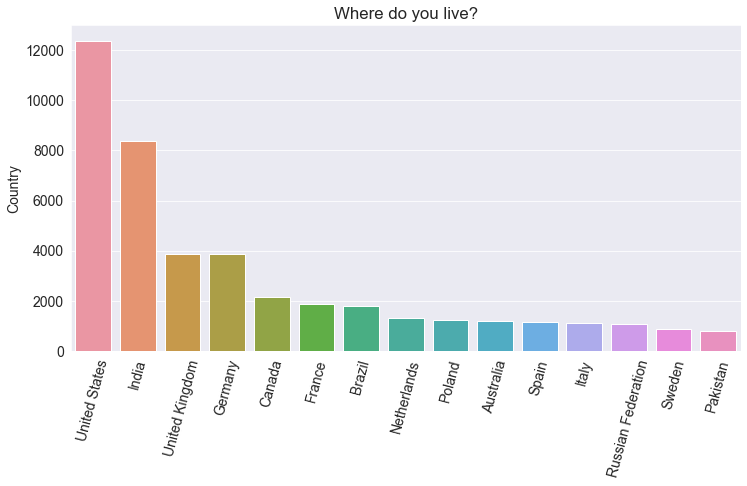

In [39]:
plt.figure(figsize = (12,6))
plt.xticks(rotation = 75)
plt.title(schema.Country)
sns.barplot(x = top_countries.index, y = top_countries);

It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.

**Exercise**:
Try finding the percentage of responses from English-speaking vs. non-English speaking countries. You can use [this list of languages spoken in different countries](https://github.com/JovianML/opendatasets/blob/master/data/countries-languages-spoken/countries-languages.csv).

In [40]:
# Here is a data frame of the languages spoken in each country.
language_df = pd.read_csv("country-language.csv")

In [41]:
language_df.sample(10)

,Country,LanguagesSpoken
96,Lebanon,"Arabic (official), French, English, Armenian"
4,Angola,"Portuguese (official), Bantu and other African..."
110,Marshall Islands,Marshallese 98% (two major dialects from the M...
48,Dominica,English (official) and French patois
132,Pakistan,"Urdu 8%, English (both official); Punjabi 48%,..."
114,Micronesia,"English (official, common), Chukese, Pohnpeian..."
170,Switzerland,"German 64%, French 20%, Italian 7% (all offici..."
64,Germany,German
93,Kyrgyzstan,"Kyrgyz, Russian (both official)"
144,Russia,"Russian, others"


Let's merge copies of each of these data frames to avoid altering the original data.

In [42]:
countries_surveyed_df = survey_df.copy().merge(language_df.copy(), on = "Country")
countries_surveyed_df = countries_surveyed_df[["Country","LanguagesSpoken"]]

In [43]:
countries_surveyed_df

,Country,LanguagesSpoken
0,Germany,German
1,Germany,German
2,Germany,German
3,Germany,German
4,Germany,German
...,...,...
61479,Solomon Islands,"English 1%–2% (official), Melanesian pidgin (l..."
61480,Cape Verde,"Portuguese, Criuolo"
61481,Cape Verde,"Portuguese, Criuolo"
61482,Gabon,"French (official), Fang, Myene, Nzebi, Bapouno..."


In [44]:
countries_surveyed_df[countries_surveyed_df["Country"] == "Republic of Korea"]
#countries_surveyed_df.LanguagesSpoken[36578]

,Country,LanguagesSpoken


In [45]:
language_df.sample(5)

,Country,LanguagesSpoken
52,Egypt,"Arabic (official), English and French widely u..."
195,Yemen,Arabic
65,Ghana,"English (official), African languages (includi..."
186,United Kingdom,"English, Welsh, Scots Gaelic"
148,St. Vincent and the Grenadines,"English, French patois"


In [46]:
# CHeck language_df for korea 
language_df[language_df["Country"] == "Republic of Korea"]

,Country,LanguagesSpoken


In [47]:
survey_df[survey_df["Country"] == "Republic of Korea"].size

1760

In [48]:
recleaned_df = survey_df.copy()[["Country"]].dropna()
recleaned_df

,Country
0,Germany
1,United Kingdom
2,Russian Federation
3,Albania
4,United States
...,...
64456,United States
64457,Morocco
64458,Viet Nam
64459,Poland


In [49]:
countries_surveyed_df.LanguagesSpoken[25144]

'Hindi 30%, English, Bengali, Gujarati, Kashmiri, Malayalam, Marathi, Oriya, Punjabi, Tamil, Telugu, Urdu, Kannada, Assamese, Sanskrit, Sindhi (all official); Hindi/Urdu; 1,600+ dialects'

Looking at the data set `language_df` it is observed that most countries don't speak a single language but other languages are also well spoken. so we shall be classifying any row of data that has `'English'` as one of the languages spoken. 

In [50]:
# Let's have a variable "english_df" to contain list of countries speaking english
english_speaking = []

# And a variable "non_english_speaking" to contain list of countries not speaking english
non_english_speaking = []

# Let's have unique values from column LanguagesSpoken.
countries_surveyed_df.LanguagesSpoken.nunique()



156

In [51]:
word = ["English"]
english_df = countries_surveyed_df[countries_surveyed_df["LanguagesSpoken"] == [word[0] for i in countries_surveyed_df.loc[0:, ("LanguagesSpoken")]]]

In [52]:
english_df

,Country,LanguagesSpoken
61402,Barbados,English
61403,Barbados,English
61404,Barbados,English
61405,Barbados,English
61406,Barbados,English


In [70]:
# function to check if language is English
def check_language(countries_surveyed_df):
    english_df = []
    for languages in countries_surveyed_df.LanguagesSpoken:
        for language in languages:
            if language == "English":
                print(languages.index())

In [71]:
check_language(countries_surveyed_df)